In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np

In [3]:
# loading dataset
data = load_iris()
X, y = data.data, data.target
y_ = y == 2

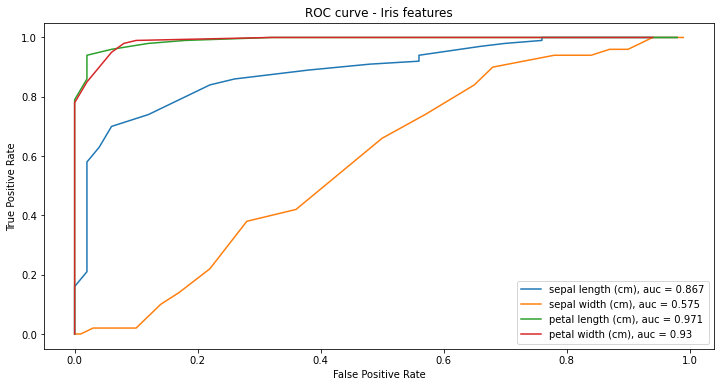

In [4]:
plt.figure(figsize=(12,6))
for col in range(X.shape[1]):
    tpr,fpr = [],[]
    for th in np.linspace(min(X[:,col]),max(X[:,col]),100):
        detP = X[:,col] < th
        tpr.append(sum(detP & y_)/sum(y_))
        fpr.append(sum(detP & (~y_))/sum((~y_)))
        
    if auc(fpr,tpr) < .5:
        aux = tpr
        tpr = fpr
        fpr = aux
    plt.plot(fpr,tpr,label=data.feature_names[col] + ', auc = '\
                           + str(np.round(auc(fpr,tpr),decimals=3)))
plt.title('ROC curve - Iris features')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()